# 410821305 W4 Quiz

<hr/>

### 目次
* numpy
* pandas
* matplotlib

### numpy
* 利用爬蟲從網路上抓取圖片（東華敖屋社的所有狗狗圖片）
* 將圖片存到本地資料夾（doggo/\*.jpg）
* 隨機選取一張圖片
* 使用numpy做<span style="color: red;">圖片處理</span>：
    * 狗狗圖片（原圖）
    ![0](0.JPG)
    * 狗狗圖片（轉成灰階）
    ![1](1.JPG)
    * 狗狗圖片（原圖且亮度變暗）
    ![2](2.JPG)
    * 狗狗圖片（轉成灰階且亮度變暗）
    ![3](3.JPG)
    * 狗狗圖片（原圖且亮度變亮）
    ![4](4.JPG)
    * 狗狗圖片（轉成灰階且亮度變亮）
    ![5](5.JPG)

In [ ]:
import requests
from bs4 import BeautifulSoup

# lists for putting links and names of the doggos
picture = []; names = []

# crawls picture from internet, append link in list "picture"
for i in range(0, 5):
    url = "http://faculty.ndhu.edu.tw/~aowoo-welfare/area" + str(i) + ".html"
    html = requests.get(url)
    html.encoding = "utf-8"
    sp = BeautifulSoup(html.text, "lxml")
    for pic_link in sp.find_all('img'):
        picture.append("http://faculty.ndhu.edu.tw/~aowoo-welfare/" + pic_link.get('src'))
        
for pic in picture:
    names.append(pic.replace("http://faculty.ndhu.edu.tw/~aowoo-welfare/image/dogs/", "").replace(".jpg", ""))

# ---
    
import os

# stores picture in local
for name in names:
    if not os.path.exists('doggo'):
        os.mkdir('doggo')
    catch = requests.get(("http://faculty.ndhu.edu.tw/~aowoo-welfare/image/dogs/" + name + ".jpg"))
    with open('doggo/' + name + ".jpg", 'wb') as file:
        file.write(catch.content)
        file.flush()
    file.close()

# ---
    
import random

# sort the names in the list "names"
names.sort()

# randomly choose a picture
target = names[random.randint(1, len(names)) - 1]

# ---

# user inputs
print("輸入0 -> 狗狗圖片（原圖）")
print("輸入1 -> 狗狗圖片（轉成灰階）")
print("輸入2 -> 狗狗圖片（原圖且亮度變暗）")
print("輸入3 -> 狗狗圖片（轉成灰階且亮度變暗）")
print("輸入4 -> 狗狗圖片（原圖且亮度變亮）")
print("輸入5 -> 狗狗圖片（轉成灰階且亮度變亮）")
command = int(input())

# ---

import cv2
if command == 0:
    img = cv2.imread("doggo/" + str(target) + ".jpg")
    cv2.imshow(target, img)
    cv2.waitKey(0)
elif command == 1:
    img = cv2.imread("doggo/" + str(target) + ".jpg", cv2.IMREAD_GRAYSCALE)
    cv2.imshow(target, img)
    cv2.waitKey(0)
elif command == 2:
    img = cv2.imread("doggo/" + str(target) + ".jpg")
    img = img.astype('int16')
    img -= 75
    img = img.clip(0, 255)
    img = img.astype('uint8')
    cv2.imshow(target, img)
    cv2.waitKey(0)
elif command == 3:
    img = cv2.imread("doggo/" + str(target) + ".jpg", cv2.IMREAD_GRAYSCALE)
    img = img.astype('int16')
    img -= 50
    img = img.clip(0, 255)
    img = img.astype('uint8')
    cv2.imshow(target, img)
    cv2.waitKey(0)
elif command == 4:
    img = cv2.imread("doggo/" + str(target) + ".jpg")
    img = img.astype('int16')
    img += 75
    img = img.clip(0, 255)
    img = img.astype('uint8')
    cv2.imshow(target, img)
    cv2.waitKey(0)
elif command == 5:
    img = cv2.imread("doggo/" + str(target) + ".jpg", cv2.IMREAD_GRAYSCALE)
    img = img.astype('int16')
    img += 50
    img = img.clip(0, 255)
    img = img.astype('uint8')
    cv2.imshow(target, img)
    cv2.waitKey(0)
else:
    print("Wrong command!")

### pandas
* 利用爬蟲抓取國立東華大學跨領域網站上的前五筆資料（活動名稱、主辦單位、活動日期時間、報名日期時間）
* 使用<span style="color: red;">pandas.DataFrame進行儲存並列印出來</span>
* 以下為範例：
<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>1</th>
      <th>2</th>
      <th>3</th>
      <th>4</th>
      <th>5</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>event name</th>
      <td>「未來啟航，指引更好的自己」(講師：李蕙如實習心理師)</td>
      <td>ｉｄｕ！ｉｄｕ！換工囉～（一）</td>
      <td>ｉｄｕ！ｉｄｕ！換工囉～（二）</td>
      <td>2021「後疫情時代地方治理的挑戰和展望」座談會</td>
      <td>〈日記能告訴我們什麼故事？：以「臺灣人唯一之言論機關」的經營為例〉</td>
    </tr>
    <tr>
      <th>organizer</th>
      <td>心理諮商輔導中心 心理諮商組</td>
      <td>學務處 原住民族學生資源中心</td>
      <td>學務處 原住民族學生資源中心</td>
      <td>人文社會科學學院 公共行政學系</td>
      <td>人文社會科學學院 歷史學系</td>
    </tr>
    <tr>
      <th>event time</th>
      <td>2021/11/05 11:00(五)~ 2021/11/05 12:00(五)</td>
      <td>2021/11/06 14:00(六)~ 2021/11/06 17:00(六)</td>
      <td>2021/11/07 14:00(日)~ 2021/11/07 17:00(日)</td>
      <td>2021/11/08 10:30(一)~ 2021/11/08 12:00(一)</td>
      <td>2021/11/08 14:00(一)~ 2021/11/08 16:00(一)</td>
    </tr>
    <tr>
      <th>register time</th>
      <td>2021/10/18 12:00(一)~ 2021/11/13 12:00(六)</td>
      <td>2021/11/04 00:00(四)~ 2021/11/06 12:00(六)</td>
      <td>2021/11/04 12:00(四)~ 2021/11/07 12:00(日)</td>
      <td>2021/10/22 10:30(五)~ 2021/11/07 23:59(日)</td>
      <td>2021/11/01 00:00(一)~ 2021/11/07 00:00(日)</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://sys.ndhu.edu.tw/SA/XSL_ApplyRWD/ActApply.aspx"
html = requests.get(url)
html.encoding = "utf-8"
sp = BeautifulSoup(html.text, 'lxml')

info = pd.DataFrame([], index = [i + 1 for i in range(0, 5)])
event = []; who_hold = []; event_time = []; registeration = []
for i in range(0, 5):
    event.append(sp.find('span', id = 'BodyContent_gvActs_lblGv_act_name_' + str(i)).text)
    who_hold.append(sp.find('span', id = 'BodyContent_gvActs_lblGv_act_unit_' + str(i)).text)
    event_time.append(sp.find('span', id = 'BodyContent_gvActs_lblGv_act_dt_' + str(i)).text)
    registeration.append(sp.find('span', id = 'BodyContent_gvActs_lblGv_reg_dt_' + str(i)).text)
    
info['event name'] = event
info['organizer'] = who_hold
info['event time'] = event_time
info['register time'] = registeration

display(info.transpose())

### matplotlib
* 利用爬蟲抓取氣象預測資料（最高溫、最低溫、日期）
* <span style="color: red;">使用matplotlib.pyplot繪圖（使用折線圖）</span>
* 以下為範例：
<img src="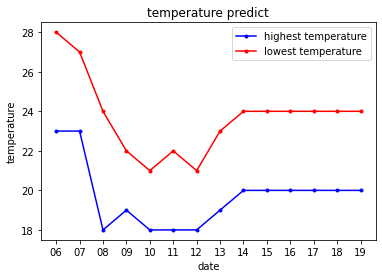
">

In [ ]:
import requests
from bs4 import BeautifulSoup

# crawls the weather report
url = "https://weather.com/zh-TW/weather/tenday/l/Hualien+City+Hualien?canonicalCityId=1fa486d0817b704aabac02d30d98047ef39e35408a09d04c27411794a5b5ba31"
html = requests.get(url)
html.encoding = "utf-8"
sp = BeautifulSoup(html.text, "lxml")
temperatureH_list = sp.find_all('span', 'DetailsSummary--highTempValue--3Oteu')
temperatureL_list = sp.find_all('span', 'DetailsSummary--lowTempValue--3H-7I')
day_list = sp.find_all('h2', 'DetailsSummary--daypartName--2FBp2')
day_list = day_list[1:]
temperatureH_list = temperatureH_list[1:]
temperatureL_list = temperatureL_list[1:]
for i in range(len(temperatureL_list)):
    temperatureL_list[i] = int(temperatureL_list[i].text.strip('°'))
for i in range(len(temperatureH_list)):
    temperatureH_list[i] = int(temperatureH_list[i].text.strip('°'))
for i in range(len(day_list)):
    day_list[i] = (day_list[i].text)[3:]

# ---

import matplotlib.pyplot as plt

plt.plot(day_list, temperatureL_list, 'b.-')
plt.plot(day_list, temperatureH_list, 'r.-')
plt.legend(['highest temperature', 'lowest temperature'])
plt.title('temperature predict')
plt.xlabel('date')
plt.ylabel('temperature')
plt.show()